In [28]:
setwd('/import/a10/')

In [29]:
data = read.table('./count.txt',sep = '\t',header =T)

In [30]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

In [68]:
rownames(data) = data[,1]

In [69]:
head(data)

,Symbol,FC,Log2FC,P_value,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
RPS27A,RPS27A,0.4851,-1.044,7.198e-04,down
PCLO,PCLO,8.0600,3.011,4.442e-02,up
VN1R5,VN1R5,2.4410,1.287,6.881e-03,up
ZNF827,ZNF827,2.6790,1.422,4.586e-03,up
STON2,STON2,3.0410,1.605,1.128e-03,up
POLR2A,POLR2A,0.3633,-1.461,2.540e-06,down


In [76]:
top_51 <- bind_rows(   
      data %>%
        filter(group == 'up') %>%
        arrange( desc(Log2FC),P_value) %>%
        head(5),
      data %>%
        filter(group == 'down') %>%
        arrange( Log2FC,P_value) %>%
        head(5)
    )

In [ ]:
rownames(top_5) = top_5[,1]

top_5 = rbind(data['ATG101',],top_5)


    ggplot(data=data,aes(x=Log2FC,y=-log10(P_value)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
   geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= Log2FC,y= -log10(P_value),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","#D27356"))+
    theme_half_open() +
  theme(axis.title.x = element_text(size = 15))+
  theme(axis.text.x = element_text(size = 15))+
  theme(axis.text.y = element_text(size = 15))+
  theme(plot.title = element_text(size = 15,face = 4, hjust =0.5))
    #ggsave('Volcano.pdf',height = 8,width = 8)
    
   

In [77]:
top_5 <- bind_rows(   
      data %>%
        filter(group == 'up') %>%
        arrange(P_value, desc(Log2FC)) %>%
        head(5),
      data %>%
        filter(group == 'down') %>%
        arrange( P_value,desc(Log2FC)) %>%
        head(5)
    )

In [80]:
top_5 = data[c('ATG101','CLPX','YBX3','CHTOP','NSA2','SURF6','F5','KRT86'),]

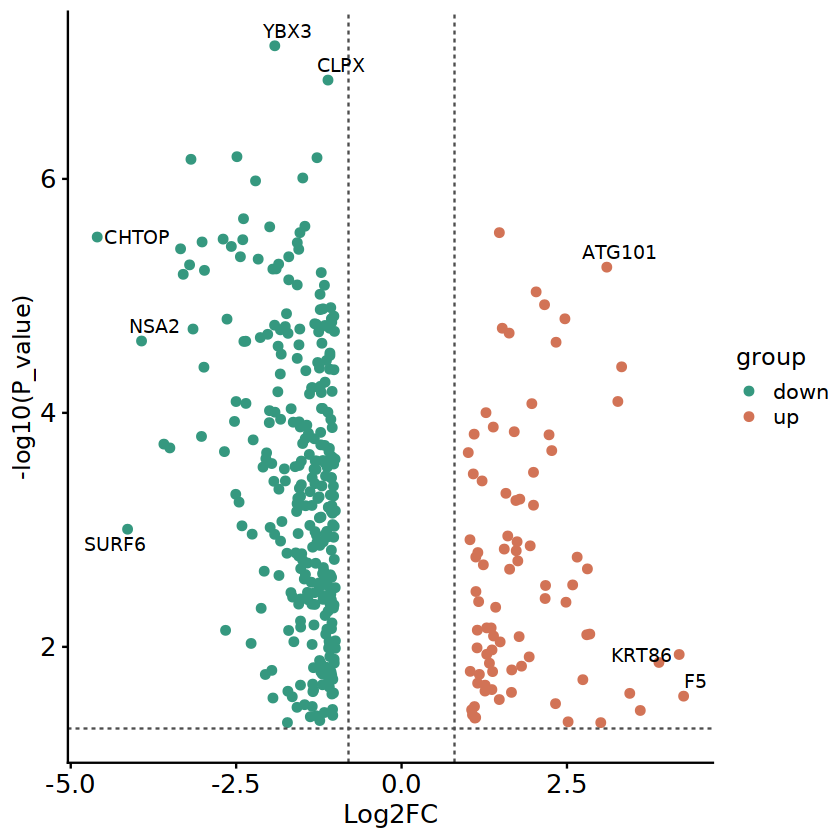

In [82]:
#rownames(top_5) = top_5[,1]

#top_5 = rbind(data['ATG101',],top_5)


    ggplot(data=data,aes(x=Log2FC,y=-log10(P_value)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
   geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= Log2FC,y= -log10(P_value),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","#D27356"))+
    theme_half_open() +
  theme(axis.title.x = element_text(size = 15))+
  theme(axis.text.x = element_text(size = 15))+
  theme(axis.text.y = element_text(size = 15))+
  theme(plot.title = element_text(size = 15,face = 4, hjust =0.5))
    ggsave('Volcano.pdf',height = 8,width = 8)
    
   